# Práctica 1

In [29]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

#### TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

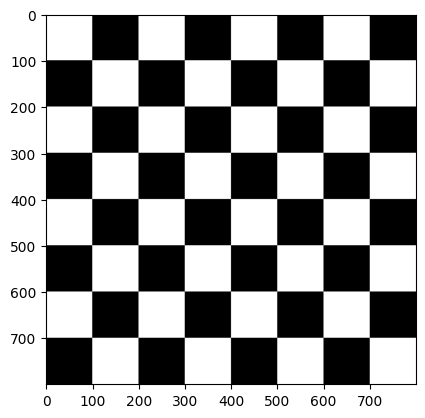

In [30]:
tablero = np.zeros((800, 800, 1), dtype=np.uint8)

for i in range(8):      # filas con 8 cuadros
    for j in range(8):  # columnas con 8 cuadros
        if (i + j) % 2 == 0:  # Si la suma de los índices es par, pintar el cuadro de blanco
            tablero[i*100:(i+1)*100, j*100:(j+1)*100, 0] = 255  

#Muestra la imagen con matplotlib
plt.imshow(tablero, cmap='gray')
plt.savefig("salidas/ajedrez.png", dpi=300, bbox_inches="tight")
plt.show()

#### TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ ) con las funciones de dibujo de OpenCV

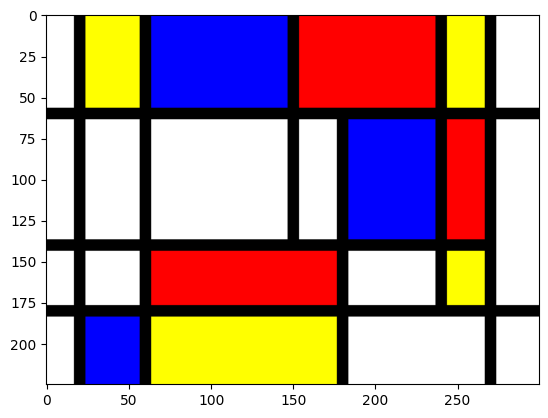

In [31]:
alto = 225
ancho = 300

rojo = (255, 0, 0)
azul = (0, 0, 255)
amarillo = (255, 255, 0)
negro = (0, 0, 0)

grosor = 5

mondrian = np.ones((alto, ancho, 3), dtype=np.uint8) * 255

# Rectángulos
cv2.rectangle(mondrian, (60, 180), (180, alto), amarillo, -1)
cv2.rectangle(mondrian, (20, 0), (60, 60), amarillo, -1)
cv2.rectangle(mondrian, (240, 0), (270, 60), amarillo, -1)
cv2.rectangle(mondrian, (240, 140), (270, 180), amarillo, -1)

cv2.rectangle(mondrian, (60, 140), (180, 180), rojo, -1)
cv2.rectangle(mondrian, (150, 0), (240, 60), rojo, -1)
cv2.rectangle(mondrian, (240, 60), (270, 140), rojo, -1)
cv2.rectangle(mondrian, (150, 0), (240, 60), rojo, -1)

cv2.rectangle(mondrian, (60, 0), (150, 60), azul, -1)
cv2.rectangle(mondrian, (180, 60), (240, 140), azul, -1)
cv2.rectangle(mondrian, (20, 180), (60, alto), azul, -1)

# Líneas verticales
cv2.line(mondrian, (20, 0), (20, alto), negro, grosor)
cv2.line(mondrian, (60, 0), (60, alto), negro, grosor)
cv2.line(mondrian, (150, 0), (150, 140), negro, grosor)
cv2.line(mondrian, (180, 60), (180, alto), negro, grosor)
cv2.line(mondrian, (240, 0), (240, 180), negro, grosor)
cv2.line(mondrian, (270, 0), (270, alto), negro, grosor)

# Líneas horizontales
cv2.line(mondrian, (0, 60), (ancho, 60), negro, grosor)
cv2.line(mondrian, (0, 140), (270, 140), negro, grosor)
cv2.line(mondrian, (0, 180), (ancho, 180), negro, grosor)

plt.imshow(mondrian) 
plt.savefig("salidas/mondrian.png", dpi=300, bbox_inches="tight")
plt.show()

#### TAREA: Modifica de forma libre los valores de un plano de la imagen

In [32]:
vid = cv2.VideoCapture(0)

while True:
    ret, frame = vid.read()
    if ret:
        h, w, c = frame.shape

        # Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]

        zero = np.zeros_like(b)

        # Se separa cada canal en su color
        rojo  = cv2.merge([zero, zero, r]) 
        verde = cv2.merge([zero, g, zero])  
        azul  = cv2.merge([b, zero, zero])   

        # Se invierte cada canal
        rojo_inv = cv2.merge([zero, zero, 255 - r])   
        verde_inv = cv2.merge([zero, 255 - g, zero])
        azul_inv = cv2.merge([255 - b, zero, zero])

        # Otras modificaciones
        # Ruido en canal rojo
        r_ruido = r.copy()
        ruido = np.random.randint(0, 200, r.shape, dtype=np.uint8)
        r_ruido = cv2.add(r_ruido, ruido)
        rojo_ruido = cv2.merge([zero, zero, r_ruido])

        # Franjas en canal verde
        franja_horizontal = g[100:120, :] = 255
        franja_vertical = g[:, 150:170] = 255
        verde_franja = cv2.merge([zero, g, zero])

        # Saturación azul
        factor = 4
        b_sat = np.clip(b * factor, 0, 255).astype(np.uint8)
        azul_sat = cv2.merge([b_sat, zero, zero])

    # Collage 3x3
    fila1 = np.hstack((rojo, verde, azul))
    fila2 = np.hstack((rojo_inv, verde_inv, azul_inv))
    fila3 = np.hstack((rojo_ruido, verde_franja, azul_sat))

    collage_3x3 = np.vstack((fila1, fila2, fila3))

    cv2.imshow('Collage 3x3', cv2.resize(collage_3x3, (int(w*1.5), int(h*1.5)), cv2.INTER_NEAREST))

    # Salir con ESC
    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()


#### TAREA: Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen ¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

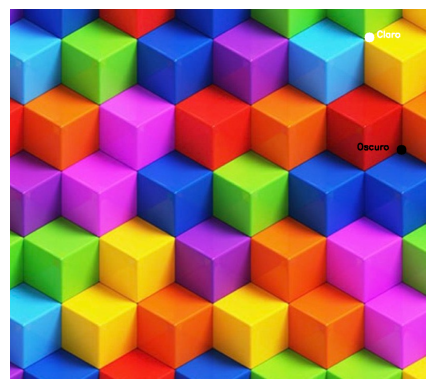

In [33]:
fuente = cv2.FONT_HERSHEY_SIMPLEX
blanco = (255, 255, 255)
negro = (0, 0, 0)

# Leer imagen
frame = cv2.imread('recursos/deteccionpixeles.jpg')

# Pasar a gris para buscar min y max
gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gris)

# Dibujar sobre la imagen en color
cv2.circle(frame, min_loc, 10, negro, -1)
cv2.putText(frame, "Oscuro", (min_loc[0] - 90, min_loc[1]), 
            fuente, 0.6, negro, 2)

cv2.circle(frame, max_loc, 10, blanco, -1)
cv2.putText(frame, "Claro", (max_loc[0] + 15, max_loc[1]), 
            fuente, 0.6, blanco, 2)

# Convertir a RGB para mostrar con matplotlib
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_rgb)
plt.axis("off")
plt.savefig("salidas/pixeles.png", dpi=300, bbox_inches="tight")
plt.show()



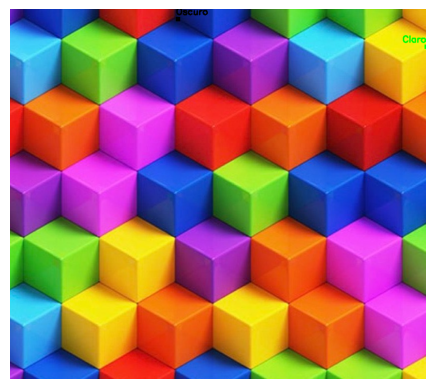

In [34]:
fuente = cv2.FONT_HERSHEY_SIMPLEX
verde = (0, 255, 0)
negro = (0, 0, 0)

# Cargar imagen
frame = cv2.imread("recursos/deteccionpixeles.jpg")

gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
h, w = gris.shape
block_size = 8

# Variables para guardar la mejor y peor media
min_mean, max_mean = 255, 0
min_pos, max_pos = (0, 0), (0, 0)

# Recorrer en bloques de 8x8
for y in range(0, h, block_size):
    for x in range(0, w, block_size):
        block = gris[y : y+block_size, x : x+block_size]
        mean_val = np.mean(block)

        if mean_val < min_mean:
            min_mean = mean_val
            min_pos = (x, y)

        if mean_val > max_mean:
            max_mean = mean_val
            max_pos = (x, y)

# Rectángulo zona más oscura 
cv2.rectangle(frame, min_pos, (min_pos[0] + block_size, min_pos[1] + block_size), negro, -1)
cv2.putText(frame, "Oscuro", (min_pos[0], min_pos[1]-5),
            fuente, 0.6, negro, 2)

# Rectángulo zona más clara 
cv2.rectangle(frame, max_pos, (max_pos[0] + block_size, max_pos[1] + block_size), verde, -1)
cv2.putText(frame, "Claro", (max_pos[0] - 45, max_pos[1]-5),
            fuente, 0.6, verde, 2)

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_rgb)
plt.axis("off")
plt.savefig("salidas/pixeles8x8.png", dpi=300, bbox_inches="tight")
plt.show()

#### TAREA: Llevar a cabo una propuesta propia de pop art

In [35]:
vid = cv2.VideoCapture(0)

ancho, alto = 320, 240

while True:
    ret, frame = vid.read()
    
    if ret:
        frame = cv2.resize(frame, (ancho, alto))

        panel1 = cv2.applyColorMap(frame, cv2.COLORMAP_JET)

        pixelated = cv2.resize(frame, (ancho//8, alto//8), interpolation=cv2.INTER_AREA)
        panel2 = cv2.resize(pixelated, (ancho, alto), interpolation=cv2.INTER_NEAREST)
        panel2 = (panel2 // 64) * 64

        pixelated = cv2.resize(frame, (ancho//12, alto//12), interpolation=cv2.INTER_AREA)
        panel3 = cv2.resize(pixelated, (ancho, alto), interpolation=cv2.INTER_NEAREST)
        panel3 = (panel3 // 128) * 128

        panel4 = cv2.applyColorMap(frame, cv2.COLORMAP_INFERNO)

        marcos_superiores = np.hstack([panel1, panel2])
        marcos_inferiores = np.hstack([panel3, panel4])
        vista = np.vstack([marcos_superiores, marcos_inferiores])

        cv2.imshow('Muestra Pop-Art', vista)

    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()